# PARETO - Strategic Model Treatment Module and Sensitivity Analysis
The purpose of this Jupyter notebook is to give an overview of the features which comprise the water treatment module within PARETO's strategic model, and to show how PARETO can be used to perform sensitivity analysis for produced water networks. This demo makes use of PARETO's Python coding interface. If you prefer a graphical interface, you can download the PARETO GUI [here](https://www.project-pareto.org/software/) (athough we note that some of the features which are used in this demonstration are not supported in PARETO GUI).

## Introduction
This demo is based on PARETO's strategic toy case study. Relevant links:
- [Strategic model documentation](https://pareto.readthedocs.io/en/latest/model_library/strategic_water_management/index.html)
- [Documentation of PARETO case studies](https://pareto.readthedocs.io/en/latest/case_studies/index.html)

The strategic toy case study features a very small produced water network. This network is smaller than most realistic produced water networks, but the small size of this example makes it useful for testing, debugging, demonstrations, etc. Below is a schematic image of the strategic toy network:

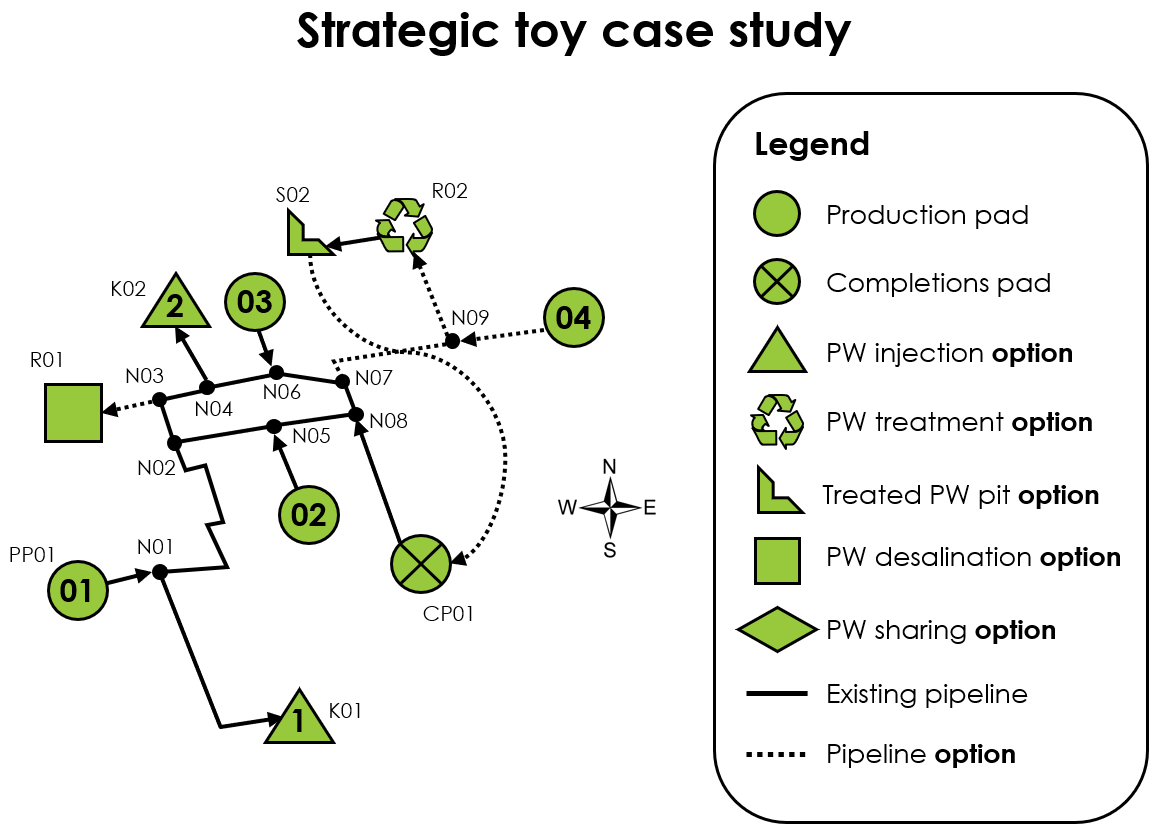

Please note that the strategic toy case study data is arbitrary, but meant to be representative of a real produced water network.

The rest of this demonstration is organized as follows:
1. [Treatment module data requirements](#data)
2. [Set up and solve Pyomo model](#solve)
3. [Sensitivity analysis](#sensitivity)
4. [Model interaction](#widgets)

## <a id='data'></a>Treatment module data requirements
In this section, we give an overview of the treatment-related data that the user must provide via the Excel input file in order to run the treatment module. Note that this is not a comprehensive overview of the data requirements for the strategic model - instead, we focus only on the data which is related to water treatment. For each relevant tab of the input file, we provide a screenshot to give a visual representation of what the data input looks like.

The PARETO team conducted a literature review to gather information about produced water treatment technologies. The results of this search have been summarized in an Excel workbook which is available in the PARETO documentation (download link available [here](https://pareto.readthedocs.io/en/latest/model_library/water_treatment/index.html#treatment-cost)).

DISCLAIMER: Some parameters related to water treatment, e.g., costs and efficiency, are highly variable in practice. The data used in this case study should be considered arbitrary, but we would like to mention that the treatment parameter values which have been selected for this demo have been informed by our literature search, and are representative of some real-world water treatment systems.

### Treatment sites
In tab "TreatmentSites", provide a list of all of the treatment sites within the produced water network.

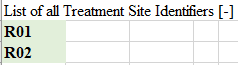

### Treatment technologies
In tab "TreatmentTechnologies", provide a list of all of the available treatment technologies:

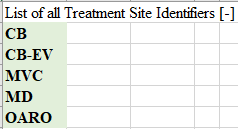

In the above list, the abbreviations stand for the following treatment technologies:
- CB: Clean brine. This is a catch-all term meant to refer to any non-desalination treatment technology. 
- CB-EV: Clean brine with enhanced evaporation. Clean brine treatment, but also includes specailized equipment used to increase the rate of evaporation of wastewater from a storage pond into the atmosphere.
- MVC: Mechanical vapor compression desalination.
- MD: Membrane distillation desalination.
- OARO: Osmotically assisted reverse osmosis desalination.

The user can remove some of these technologies and/or include additional technologies if they wish. The names for technologies can be anything that the user chooses, but references to technologies in other tabs must match the names povided here.

### Treatment capacity identifiers
In tab "TreatmentCapacities", provide a list of treatment capacitiy identifiers:

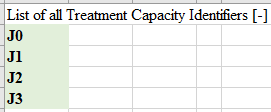

### Treatment capacity increments
In tab "TreatmentCapacityIncrements", specify the available capacities for each technology associated with the identifiers defined in tab "TreatmentCapacities":

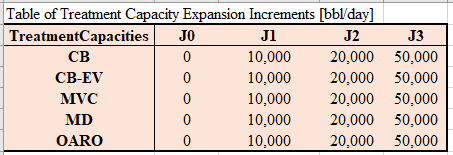

### Arcs to/from treatment sites (NRA, RNA, RSA, RCA)
In tabs "NRA", "RNA", "RSA", and "RCA", indicate how the treatment sites are connected to other elements of the produced water network:

#### NRA: node-to-treatment arcs
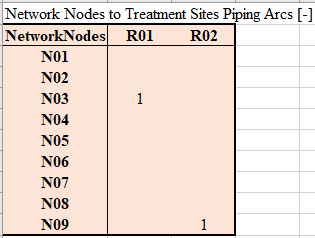

#### RNA: treatment-to-node arcs
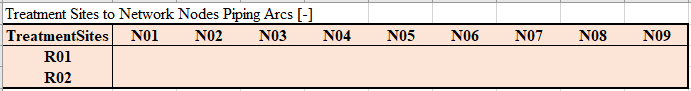

NOTE: Support for RNA arcs is likely to be removed in a future version of PARETO.

#### RSA: treatment-to-storage arcs
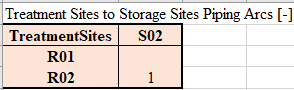

#### RCA: treatment-to-completions arcs
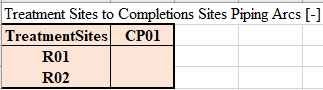

### Initial treatment capacity
In tab "InitialTreatmentCapacity", specify the initial treatment capacity at each site:

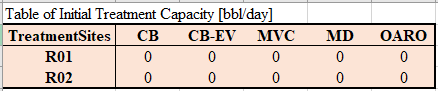

### Treatment operational cost (OPEX)
In tab "TreatmentOperationalCost", specify the operational cost of each technology at each site:

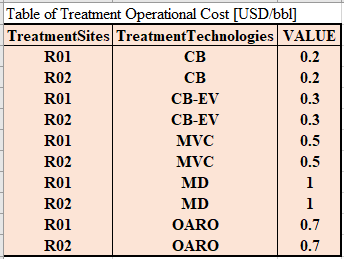

### Treatment expansion cost (CAPEX)
In tab "TreatmentExpansionCost", specify the cost of building additional capacity of each technology at each site:

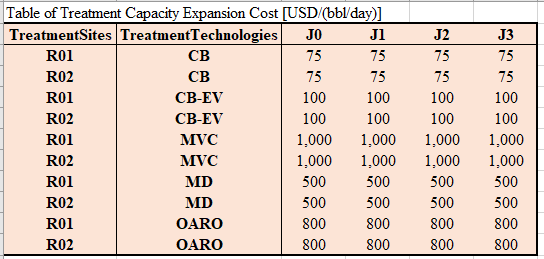

NOTE: Only one treatment technology can be selected for expansion at each treatment site.

### Treatment water efficiency (water recovery)
In tab "TreatmentEfficiency", specify the water efficiency of each technology at each site (this parameter amounts to the fraction of water in the inlet which is recovered in the treated stream):

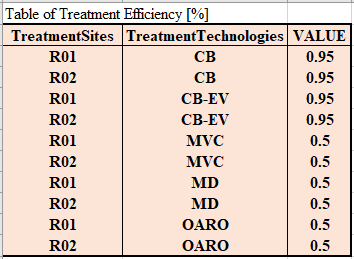

### Pad water quality
In tab "PadWaterQuality", specify the concentration of each quality component in the produced water which comes from each production pad and completions pad:

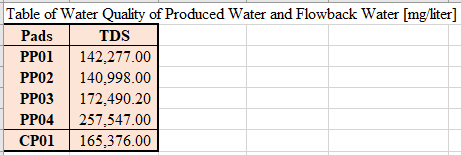

IMPORTANT: The column header(s) in this tab are used to specify the quality components that are part of the model. That is, there is not a separate tab to specify the quality components. In the above screenshot, there is only one quality component (TDS).

### Component removal effiency
In tab "RemovalEfficiency", for each, site, technology, and quality component, specify the fraction of the component (by mass) which goes to the residual stream:

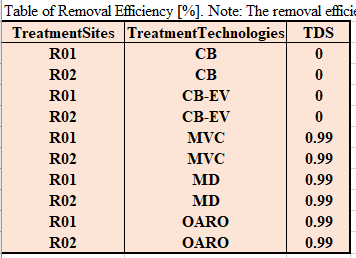

NOTE: Let us clarify the difference between treatment efficiency and component removal efficiency. Treatment efficiency refers to the fraction of water which enters the treatment site that is recovered for reuse (the remainder becomes waste water). Component removal efficiency refers to the amount of contaminants (e.g., TDS) that is removed from the treated water (and thus concentrated in the waste water).

NOTE: PARETO supports two different definitions for treatment component removal efficiency. See [this](https://pareto.readthedocs.io/en/latest/model_library/water_treatment/index.html#treatment-component-removal-efficiency) page for details.

### Desalination technologies
In tab "DesalinationTechnologies", specify whether or not each technology is for desalination:

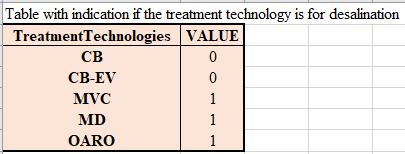

### Desalination sites
In tab "DesalinationSites", specify whether or not each site is avaialble for desalination technologies or non-desalination technologies:

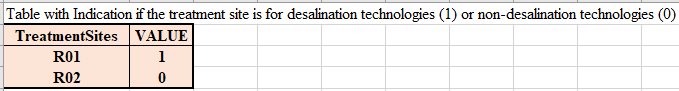

If a treatment site is specified as a desalination site, then only desalination technologies may be built there. Similarly, if a treatment site is specified as a non-desalination site, then only non-desalination technologies may be built there.

### Storage initial water quality
In tab "StorageInitialWaterQuality", specify the initial quality of the water in each storage site:

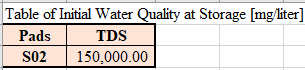

### Pad storage initial water quality
In tab "PadStorageInitialWaterQuality", specify the initial quality of the water at the built-in storage at each completions pad:

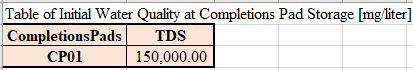

NOTE: It is possible that in the future PARETO will no longer support built-in storage capacity at completions pads.

## <a id='solve'></a>Set up and solve Pyomo model
To begin, ensure that you are working in a development environment where PARETO is installed. For example, if you followed the PARETO [installation instructions](https://pareto.readthedocs.io/en/latest/getting_started/index.html) to create a conda environment called `pareto-env`, then make sure that environment is active by running `conda activate pareto-env`.

NOTE: The code in this notebook uses the Gurobi commerical optimization solver by default. If you do not have Gurobi installed, it will use the free solver CBC instead. The code will be slower running with CBC than with Gurobi.

The following code creates and solves the Pyomo model:

In [ ]:
#####################################################################################################
# PARETO was produced under the DOE Produced Water Application for Beneficial Reuse Environmental
# Impact and Treatment Optimization (PARETO), and is copyright (c) 2021-2023 by the software owners:
# The Regents of the University of California, through Lawrence Berkeley National Laboratory, et al.
# All rights reserved.
#
# NOTICE. This Software was developed under funding from the U.S. Department of Energy and the U.S.
# Government consequently retains certain rights. As such, the U.S. Government has been granted for
# itself and others acting on its behalf a paid-up, nonexclusive, irrevocable, worldwide license in
# the Software to reproduce, distribute copies to the public, prepare derivative works, and perform
# publicly and display publicly, and to permit others to do so.
#####################################################################################################

from pareto.strategic_water_management.strategic_produced_water_optimization import (
    WaterQuality,
    create_model,
    Objectives,
    PipelineCost,
    PipelineCapacity,
)
from pareto.utilities.get_data import get_data
from pareto.examples.strategic_model_treatment_module_demo.utilities import (
    solve_and_check_feasibility,
    get_R01_results,
    create_widgets,
)
from importlib import resources
from pyomo.environ import Constraint, value, units
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Each entry in set_list corresponds to a tab in the Excel input file that
# defines an index set.
set_list = [
    "ProductionPads",
    "CompletionsPads",
    "SWDSites",
    "FreshwaterSources",
    "StorageSites",
    "TreatmentSites",
    "ReuseOptions",
    "NetworkNodes",
    "PipelineDiameters",
    "StorageCapacities",
    "InjectionCapacities",
    "TreatmentCapacities",
    "TreatmentTechnologies",
]
# Each entry in parameter_list also corresponds to a tab in the Excel input
# file, but these tabs have parameter data.
parameter_list = [
    "Units",
    "PNA",
    "CNA",
    "CCA",
    "NNA",
    "NCA",
    "NKA",
    "NRA",
    "NSA",
    "FCA",
    "RCA",
    "RNA",
    "RSA",
    "SCA",
    "SNA",
    "PCT",
    "PKT",
    "FCT",
    "CST",
    "CCT",
    "CKT",
    "CompletionsPadOutsideSystem",
    "DesalinationTechnologies",
    "DesalinationSites",
    "TruckingTime",
    "CompletionsDemand",
    "PadRates",
    "FlowbackRates",
    "NodeCapacities",
    "InitialPipelineCapacity",
    "InitialDisposalCapacity",
    "InitialTreatmentCapacity",
    "FreshwaterSourcingAvailability",
    "PadOffloadingCapacity",
    "CompletionsPadStorage",
    "DisposalOperationalCost",
    "TreatmentOperationalCost",
    "ReuseOperationalCost",
    "PipelineOperationalCost",
    "FreshSourcingCost",
    "TruckingHourlyCost",
    "PipelineDiameterValues",
    "DisposalCapacityIncrements",
    "InitialStorageCapacity",
    "StorageCapacityIncrements",
    "TreatmentCapacityIncrements",
    "TreatmentEfficiency",
    "RemovalEfficiency",
    "DisposalExpansionCost",
    "StorageExpansionCost",
    "TreatmentExpansionCost",
    "PipelineCapexDistanceBased",
    "PipelineCapexCapacityBased",
    "PipelineCapacityIncrements",
    "PipelineExpansionDistance",
    "Hydraulics",
    "Economics",
    "PadWaterQuality",
    "StorageInitialWaterQuality",
    "PadStorageInitialWaterQuality",
    "DisposalOperatingCapacity",
]

# Load data from Excel input file into Python
with resources.path(
    "pareto.case_studies",
    "strategic_toy_case_study.xlsx",
) as fpath:
    [df_sets, df_parameters] = get_data(fpath, set_list, parameter_list)

# Create Pyomo optimization model representing the produced water network
strategic_model = create_model(
    df_sets,
    df_parameters,
    default={
        "objective": Objectives.cost,
        "pipeline_cost": PipelineCost.distance_based,
        "pipeline_capacity": PipelineCapacity.input,
        "node_capacity": True,
        "water_quality": WaterQuality.false,
    },
)

# Solve Pyomo model with specified options
results_dict = solve_and_check_feasibility(strategic_model)

## <a id='sensitivity'></a>Sensitivity analysis
To perform sensitivity analysis, we can change model data and then re-solve the model to see the effects on the optimal solution. To demonstrate, we will change some of the costing data associated with desalination technologies to see the effect on which technology gets selected for site R01.

First, we extract results on treatment buildout at R01 from our solved model:

In [ ]:
# Extract R01 buildout results for default solved model
technology, capacity = get_R01_results(results_dict)
print(f"Technology: {technology}")
print(f"Capacity: {capacity}")
print(f"Objective function value: {value(strategic_model.v_Z)}")

At site R01, the optimizer has chosen to build MVC desalination with the capacity selected corresponding to the `J1` index. As an aside, we can look at the input data to remind ourselves what capacity `J1` corresponds to (in bbl/day):

In [ ]:
# Check what capacity J1 corresponds to (in bbl/day)
print(df_parameters["TreatmentCapacityIncrements"][("MVC", "J1")])

Let's examine the treatment operational cost data that was passed to the model:

In [ ]:
# Display treatment operational cost data
strategic_model.p_pi_Treatment.display()

Note that the units of this parameter are k\\$/kbbl, whereas we'd like to specify a new value in \\$/bbl. In this case, k\\$/kbbl is equivalent to \\$/bbl, but there are other cases where parameters in the Pyomo model are built using units which are not necessarily the same as what the user might prefer to use. So, we show how to handle these kinds of unit conversions:

In [ ]:
# Extract model units for OPEX, specify desired user units, and convert the
# default value for MVC OPEX
# Note that there are different definitions of barrel - the one we want is
# equal to 42 gallons and is named "oil_bbl" in Pyomo
opex_model_units = units.get_units(strategic_model.p_pi_Treatment)
opex_user_units = units.USD / units.oil_bbl
default_mvc_opex = units.convert_value(
    value(strategic_model.p_pi_Treatment["R01", "MVC"]),
    from_units=opex_model_units,
    to_units=opex_user_units,
)

We are going to change the operational cost of MVC and examine the effect on the optimal solution. First, we save relevant values from the default solution:

In [ ]:
# Before we change the MVC OPEX, save the default value, as well as the
# optimal R01 technology and capacity and the optimal objective function value
# Use lists so we can subsequently append other solutions to them
mvc_opex_lst = [default_mvc_opex]
tech_lst = [technology]
cap_lst = [capacity]
obj_fun_lst = [value(strategic_model.v_Z)]

Next, we select the additional values of MVC OPEX for which we want to solve the model:

In [ ]:
# Append new values for MVC OPEX
# Don't include 0.5 - that is the default value and is already the first entry
# of the list
mvc_opex_lst.extend([0.4, 0.45, 0.55, 0.6, 0.65])  # user units: $/bbl

Now, loop over all of these values for MVC OPEX, and solve the model with each one (WARNING: if you are not using Gurobi as your optimization solver, then the following cell will probably take a rather long time to execute):

In [ ]:
# Loop over all of the speficied MVC OPEX values
# Skip the first entry in mvc_opex_list, since that is the default value for
# which we already solved the model
for opex in mvc_opex_lst[1:]:
    # Change the value of the parameter in the Pyomo model represeting MVC OPEX
    opex_converted = units.convert_value(
        opex, from_units=opex_user_units, to_units=opex_model_units
    )
    strategic_model.p_pi_Treatment[:, "MVC"] = opex_converted

    # Re-solve the model and check feasibility of solution
    results_dict = solve_and_check_feasibility(strategic_model)

    # Extract results for optimal treatment buildout at R01
    technology, capacity = get_R01_results(results_dict)

    # Save the optimal values of R01 technology/capacity and objective function
    # value
    tech_lst.append(technology)
    cap_lst.append(capacity)
    obj_fun_lst.append(value(strategic_model.v_Z))

The following block of code creates and displays a plot summarizing the results:

In [ ]:
# Plot the results
c = list(map(lambda x: {"MVC": "blue", "OARO": "red", "MD": "green"}[x], tech_lst))
s = list(map(lambda x: {"J1": 35, "J2": 100, "J3": 160}[x], cap_lst))
fig, ax = plt.subplots()
scatter = ax.scatter(mvc_opex_lst, obj_fun_lst, c=c, label="label", s=s)
ax.set_xlabel("MVC OPEX [$/bbl]")
ax.set_ylabel("Total cost [k$]")
leg1_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="MVC",
        markerfacecolor="blue",
        markersize=8,
    ),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="OARO",
        markerfacecolor="red",
        markersize=8,
    ),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="MD",
        markerfacecolor="green",
        markersize=8,
    ),
]

leg2_elements = [
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="J1",
        markerfacecolor="gray",
        markersize=8,
    ),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="J2",
        markerfacecolor="gray",
        markersize=12,
    ),
    Line2D(
        [0],
        [0],
        marker="o",
        color="w",
        label="J3",
        markerfacecolor="gray",
        markersize=15,
    ),
]
leg1 = ax.legend(handles=leg1_elements, title="Technology", loc="upper left")
ax.add_artist(leg1)
leg2 = ax.legend(handles=leg2_elements, title="Capacity", loc="lower right")
plt.show()

We see that the optimizer always chooses to build treatment capacity at R01 corresponding to the `J1` index (the smallest nonzero value), but when MVC OPEX rises above ~$0.54/bbl, it is cheaper to build OARO instead.

## <a id='widgets'></a>Model interaction
Suppose we know a priori which treatment technology we want to be built at site R01. We can force the optimizer to select a given technology by adding an additional constraint to the Pyomo model. The following code adds three constraints to the model - one each to force MVC, MD, or OARO at R01 (note that at most one of these three constraints may be activated at any given time for the model to remain feasible):

In [ ]:
# Create constraint rules to force each of the three respective desalination
# technologies to be selected for RO1
def ForceMvcRule(model):
    return sum(model.vb_y_Treatment["R01", "MVC", j] for j in model.s_J) == 1


def ForceMdRule(model):
    return sum(model.vb_y_Treatment["R01", "MD", j] for j in model.s_J) == 1


def ForceOaroRule(model):
    return sum(model.vb_y_Treatment["R01", "OARO", j] for j in model.s_J) == 1


# Create the constraints
if not hasattr(strategic_model, "ForceMvcCon"):
    strategic_model.ForceMvcCon = Constraint(
        rule=ForceMvcRule, doc="Force R01 to select MVC"
    )
if not hasattr(strategic_model, "ForceMdCon"):
    strategic_model.ForceMdCon = Constraint(
        rule=ForceMdRule, doc="Force R01 to select MD"
    )
if not hasattr(strategic_model, "ForceOaroCon"):
    strategic_model.ForceOaroCon = Constraint(
        rule=ForceOaroRule, doc="Force R01 to select OARO"
    )

# At most one of these constraints can be active at a time for the model to be
# feasible; start with none of them activated
strategic_model.ForceMvcCon.deactivate()
strategic_model.ForceMdCon.deactivate()
strategic_model.ForceOaroCon.deactivate()

NOTE: Adding additional constraints to the Pyomo model is currently not possible in PARETO's GUI interface. The ability to add and disable constraints in the model is a powerful feature of PARETO's Python interface, but it requires the user to know quite a bit about Pyomo and about the underlying structure of the strategic model.

The `create_widgets` function called below creates a set of interactive widgets which allow the user to change the OPEX and CAPEX of all desalination technologies to arbitrary values. Have fun experimenting with various input values!

In [ ]:
create_widgets(strategic_model)

## Conclusion
We hope this demonstration of the treatment module within PARETO's strategic model has been helpful and informative. If you have any questions, comments, or feedback for the PARETO team, please do not hesitate to [contact us](https://www.project-pareto.org/team/contact-us/).